In [11]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%autoreload 2

In [13]:
#
import sys
sys.path.append('./')

In [14]:
# General imports
import json
from qiskit import QuantumCircuit
import numpy as np
from dataclasses import dataclass
from enum import auto, Enum

In [15]:
@dataclass
class SchedulerType(Enum):
    """The type of scheduler to use."""

    BASELINE = auto()
    SIMPLE = auto()
    EXTENDED = auto()  

In [16]:
# Configuration
# 1. Number of Jobs in the batch
jobs = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
# 2. Number of machines
machines = {"QUITO": 5, "BELEM": 5}
# 3. Scheduling type
name_schedule = SchedulerType.EXTENDED


In [17]:
# Setup
bigM = 1000000
timesteps = 2**5

from component.d_scheduling.algorithm.ilp.MILQ_extend import MILQ_extend_implementation

In [18]:
# Scheduler
MILQ_extend_implementation.example_problem(bigM, timesteps, "component/d_scheduling/algorithm/ilp/MILQ_extend/MILQ_extend_result")


Processing times for 0: [0, 0]
Processing times for A: [7, 9]
Processing times for B: [9, 8]
Setup times for 0 and 0: [50, 50]
Setup times for 0 and A: [0, 0]
Setup times for 0 and B: [0, 0]
Setup times for A and 0: [50, 50]
Setup times for A and A: [50, 50]
Setup times for A and B: [9, 6]
Setup times for B and 0: [50, 50]
Setup times for B and A: [8, 6]
Setup times for B and B: [50, 50]
Problem:
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ea2c4110640>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ea2771c0220>]
Job Capacities:
{'A': 2, 'B': 3}
Run info
Jobs in define_lp:
['0', '1', '2']
Jobs:
2
3
Jobs in set_up_extended_lp:
0
1
2
Machines in set_up_extended_lp:
QUITO
BELEM
Process times:
[[0, 0], [7, 9], [9, 8]]
Process times:
defaultdict(<function __makeDict.<locals>.<lambda> at 0x7ea277179fc0>, {'1': defaultdict(<function __makeDict.<locals>.<lambda> at 0x7ea2c41604c0>, {'QUITO': 0, 'BELEM': 0}), '2': defaultdict(<function __makeDict.<locals>.<lambda> at

  job  qubits machine  capacity  start  end  duration
0   A       2   BELEM         5    0.0  0.0       0.0
1   B       3   QUITO         5    0.0  7.0       7.0


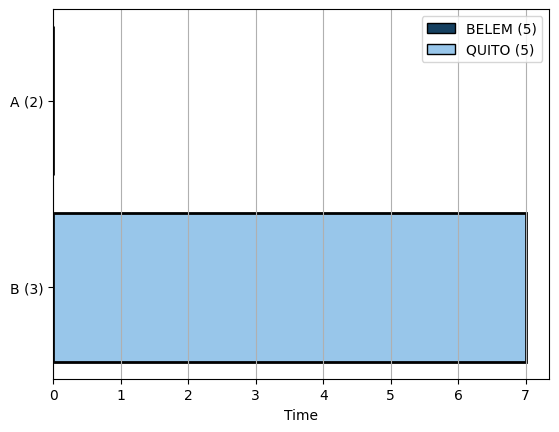

In [19]:
# Visualize
from component.d_scheduling.visualize import ilp

ilp.visualize("component/d_scheduling/algorithm/ilp/MILQ_extend/MILQ_extend_result.json")


In [20]:

# Analyze